In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Online%20Purchase.csv")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_ID  403 non-null    int64 
 1   Gender       403 non-null    object
 2   Age          403 non-null    int64 
 3   Salary       403 non-null    int64 
 4   Purchased    403 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.9+ KB


In [73]:
df.shape

(403, 5)

In [74]:
df.describe()

,Customer_ID,Age,Salary,Purchased
count,4.030000e+02,403.000000,403.000000,403.000000
mean,1.557473e+07,37.771712,70465.260546,0.357320
std,1.352373e+06,10.915209,36598.127268,0.479806
min,1.000000e+00,18.000000,500.000000,0.000000
25%,1.562463e+07,29.500000,43000.000000,0.000000
50%,1.569326e+07,37.000000,70000.000000,0.000000
75%,1.575020e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,100.000000,300000.000000,1.000000


In [75]:
df.head()

,Customer_ID,Gender,Age,Salary,Purchased
0,1,Male,35,500,0
1,2,Female,25,300000,1
2,3,Female,100,200000,0
3,15566689,Female,35,57000,0
4,15569641,Female,58,95000,1


In [76]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Salary', 'Purchased'], dtype='object')

In [77]:
y=df['Purchased']
y.shape

(403,)

In [78]:
X=df[['Age','Salary']]
X.shape


(403, 2)

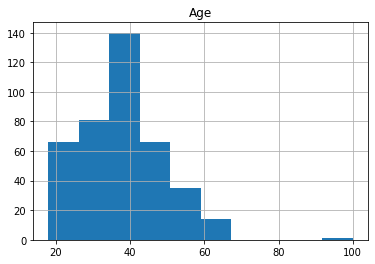

In [79]:
df[['Age']].hist();

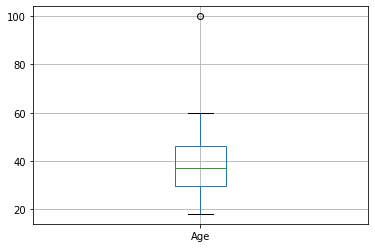

In [80]:
df[['Age']].boxplot()

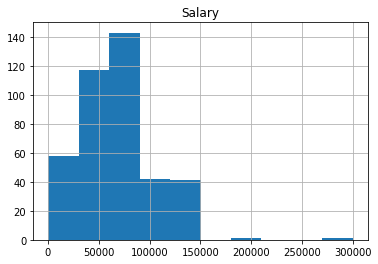

In [81]:
df[['Salary']].hist();

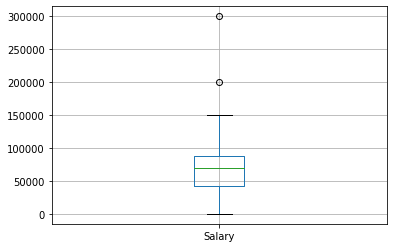

In [82]:
df[['Salary']].boxplot()

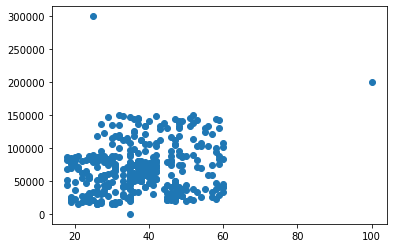

In [83]:
plt.scatter(df['Age'],df['Salary'])

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((282, 2), (121, 2), (282,), (121,))

In [85]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.fit_transform(X_test)

In [86]:
X_train_ss=pd.DataFrame(X_train_ss,columns=X_train.columns)
X_test_ss=pd.DataFrame(X_test_ss,columns=X_test.columns)

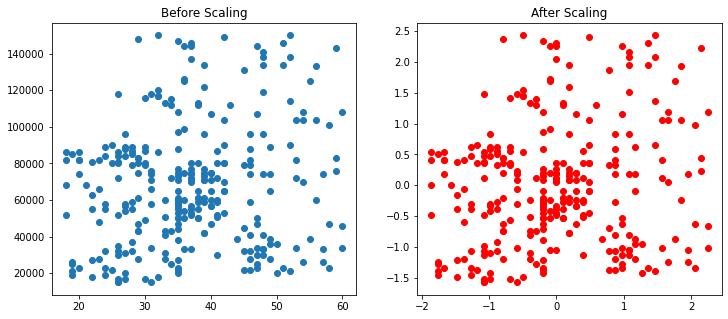

In [87]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['Salary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_ss['Age'],X_train_ss['Salary'],color='red')
ax2.set_title('After Scaling')
plt.show()


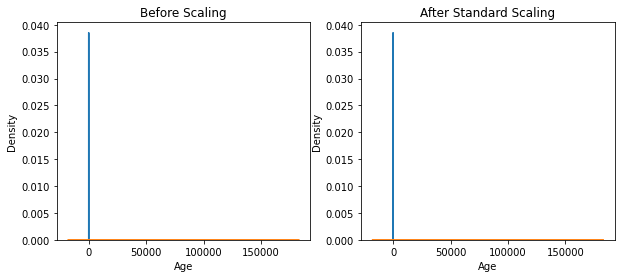

In [89]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['Salary'],ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train['Age'],ax=ax2)
sns.kdeplot(X_train['Salary'],ax=ax2)

plt.show()

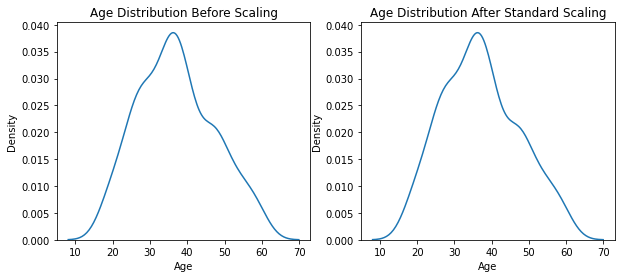

In [90]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4))

ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)


ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train['Age'],ax=ax2)

plt.show()

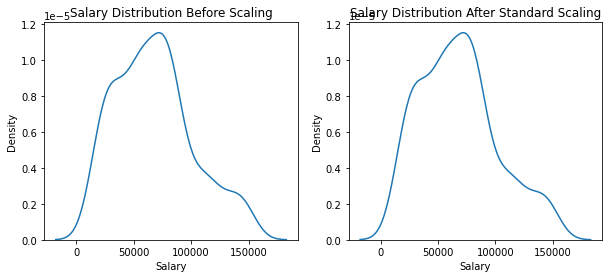

In [91]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4))

ax1.set_title('Salary Distribution Before Scaling')

sns.kdeplot(X_train['Salary'],ax=ax1)

ax2.set_title('Salary Distribution After Standard Scaling')

sns.kdeplot(X_train['Salary'],ax=ax2)

plt.show()

In [92]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [93]:
y_pred=lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.5619834710743802

In [94]:
lr.fit(X_train_ss,y_train)


LogisticRegression()

In [97]:
y_pred=lr.predict(X_test_ss)


In [98]:
accuracy_score(y_test,y_pred)

0.768595041322314